In [22]:
#In this cell all libraries used in the notebook are loaded
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import timeit

from ema_workbench import (Model, CategoricalParameter, SequentialEvaluator, MultiprocessingEvaluator, Policy, Scenario, perform_experiments,
                           ScalarOutcome, IntegerParameter, RealParameter, save_results, load_results)
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
from problem_formulation import get_model_for_problem_formulation
import copy

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [23]:
#Here the problem formulation created by group 22 is called as the dike model, and uncertainties and levers are connected to the Workbench
dike_model, planning_steps = get_model_for_problem_formulation(6)
uncertainties = dike_model.uncertainties
levers = dike_model.levers

In [3]:
#This creates a policy where all rfr projects are active
full_rfr_policy = [Policy('full rfr policy', **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      '1_RfR 0':1,
                                      '1_RfR 1':1,
                                      '1_RfR 2':1,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':1,
                                      '4_RfR 1':1, 
                                      '4_RfR 2':1, 
                                      'EWS_DaysToThreat':0,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0})]

In [4]:
#Ran the policy with 1000 scenarios
tic=timeit.default_timer()
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=1000, policies=full_rfr_policy)
toc=timeit.default_timer()

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [16]:
print('Multiprocessing time in seconds:', toc-tic)
save_results(results, 'full_rfr_policy.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\wsgru\Documents\Studie\Industrial Ecology\IE Year 1\Q4\Model-based Decision-making\epa1361_open-master2\epa1361_open-master\final assignment\full_rfr_policy.tar.gz


Multiprocessing time in seconds: 1077.6565305000001


[MainProcess/INFO] results loaded succesfully from C:\Users\wsgru\Documents\Studie\Industrial Ecology\IE Year 1\Q4\Model-based Decision-making\epa1361_open-master2\epa1361_open-master\final assignment\full_rfr_policy.tar.gz
C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


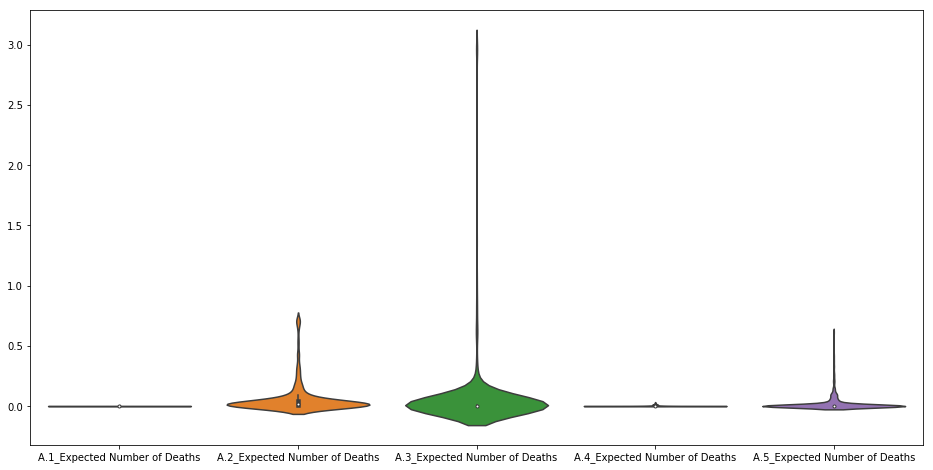

In [6]:
experiments, outcomes = load_results('full_rfr_policy.tar.gz')
deaths = pd.DataFrame(outcomes, columns = ['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths',
                                         'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'])
fig, ax = plt.subplots(figsize=(16,8))
sns.violinplot(data=deaths, scale='width');

In [17]:
# total_deaths = sum(deaths['A.5_Expected Number of Deaths'][0:1000] > 0.01) #+sum(deaths['A.2_Expected Number of Deaths'][0:1000] > 0.01)+sum(deaths['A.3_Expected Number of Deaths'][0:1000] > 0.01)+sum(deaths['A.4_Expected Number of Deaths'][0:1000] > 0.01)+sum(deaths['A.5_Expected Number of Deaths'][0:1000]> 0.01)
# print(total_deaths)
y = []
for i in range(1000):
    if outcomes['A.1_Expected Number of Deaths'][i]> 0.01 or outcomes['A.2_Expected Number of Deaths'][i]> 0.01 or outcomes['A.3_Expected Number of Deaths'][i]> 0.01 or outcomes['A.4_Expected Number of Deaths'][i]> 0.01 or outcomes['A.5_Expected Number of Deaths'][i]> 0.01:
        y.append(True)
    else:
        y.append(False)
y = np.array(y)
print('Number of scenarios with more than 0.01 deaths in any location:', sum(y))

Number of scenarios with more than 0.01 deaths in any location: 855


Fraction of solutions with more than 1e8 damage: 0.0314


C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


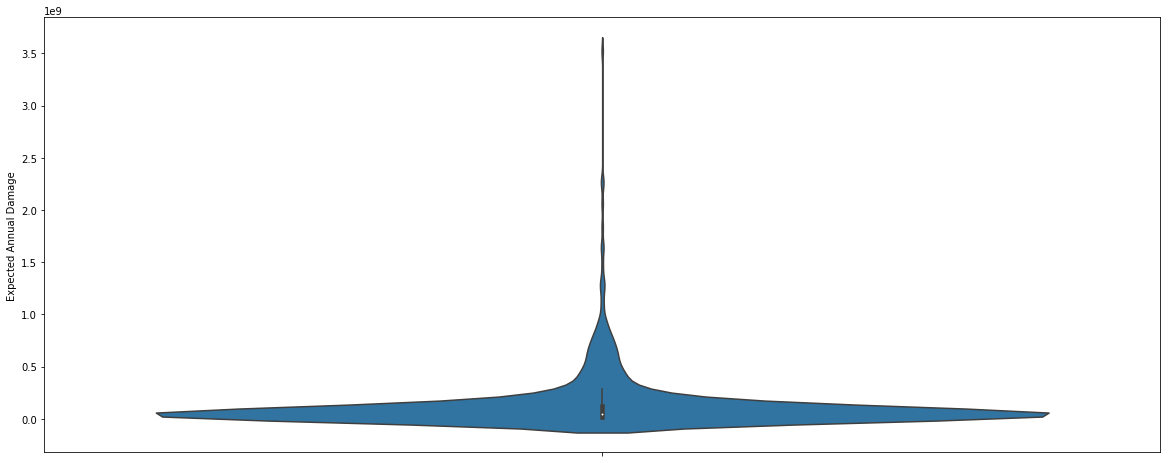

In [7]:
data = pd.DataFrame(outcomes)
# data['policy'] = rfr_experiments['policy']
fig, ax = plt.subplots(figsize=(20,8))
sns.violinplot(data=data, y='Expected Annual Damage')
damage_fraction = outcomes['Expected Annual Damage'] >= 1e8
print('Fraction of solutions with more than 1e8 damage:',  sum(damage_fraction)/10000);

In [8]:
costs = pd.DataFrame(outcomes, columns = ['RfR Investment Costs'])
costs['policy'] = experiments['policy']
short = costs.drop_duplicates(['RfR Investment Costs', 'policy'])
short

,RfR Investment Costs,policy
0,2.131200e+09,full rfr policy


In [24]:
ews_rfr_policies = [Policy('ews1 rfr policy', **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      '1_RfR 0':1,
                                      '1_RfR 1':1,
                                      '1_RfR 2':1,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':1,
                                      '4_RfR 1':1, 
                                      '4_RfR 2':1, 
                                      'EWS_DaysToThreat':1,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0}),
                 Policy('ews2 rfr policy', **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      '1_RfR 0':1,
                                      '1_RfR 1':1,
                                      '1_RfR 2':1,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':1,
                                      '4_RfR 1':1, 
                                      '4_RfR 2':1, 
                                      'EWS_DaysToThreat':2,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0}),
                 Policy('ews3 rfr policy', **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      '1_RfR 0':1,
                                      '1_RfR 1':1,
                                      '1_RfR 2':1,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':1,
                                      '4_RfR 1':1, 
                                      '4_RfR 2':1, 
                                      'EWS_DaysToThreat':3,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0}),
                 Policy('ews4 rfr policy', **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      '1_RfR 0':1,
                                      '1_RfR 1':1,
                                      '1_RfR 2':1,
                                      '2_RfR 0':1,
                                      '2_RfR 1':1,
                                      '2_RfR 2':1, 
                                      '3_RfR 0':1, 
                                      '3_RfR 1':1, 
                                      '3_RfR 2':1, 
                                      '4_RfR 0':1,
                                      '4_RfR 1':1, 
                                      '4_RfR 2':1, 
                                      'EWS_DaysToThreat':4,
                                      'A.1_DikeIncrease 0':0, 
                                      'A.1_DikeIncrease 1':0, 
                                      'A.1_DikeIncrease 2':0,
                                      'A.2_DikeIncrease 0':0,
                                      'A.2_DikeIncrease 1':0,
                                      'A.2_DikeIncrease 2':0,
                                      'A.3_DikeIncrease 0':0,
                                      'A.3_DikeIncrease 1':0,
                                      'A.3_DikeIncrease 2':0,
                                      'A.4_DikeIncrease 0':0,
                                      'A.4_DikeIncrease 1':0,
                                      'A.4_DikeIncrease 2':0,
                                      'A.5_DikeIncrease 0':0,
                                      'A.5_DikeIncrease 1':0,
                                      'A.5_DikeIncrease 2':0})]

In [25]:
#Although the code broke, the data was stored in a previous run
tic2=timeit.default_timer()
with MultiprocessingEvaluator(dike_model) as evaluator:
    results2 = evaluator.perform_experiments(scenarios=1000, policies=ews_rfr_policies)
toc2=timeit.default_timer()

BrokenPipeError: [Errno 32] Broken pipe

[MainProcess/INFO] results loaded succesfully from C:\Users\wsgru\Documents\Studie\Industrial Ecology\IE Year 1\Q4\Model-based Decision-making\epa1361_open-master2\epa1361_open-master\final assignment\ews_rfr_policies.tar.gz
C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


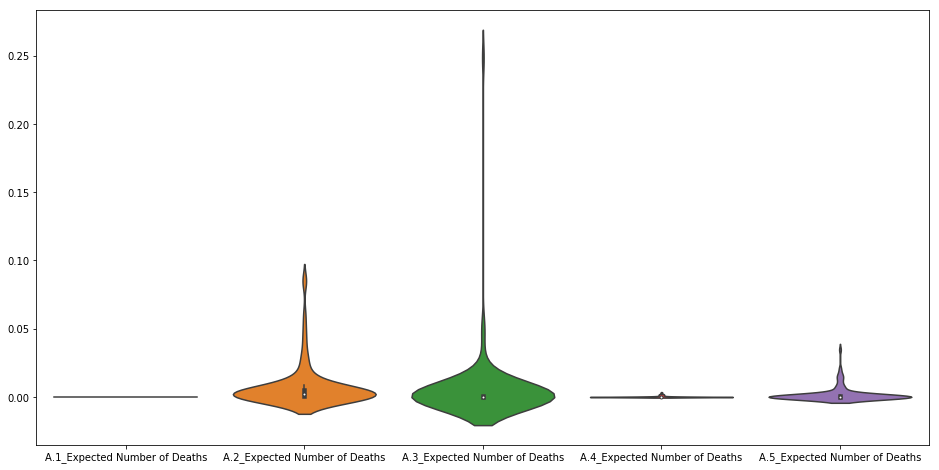

In [20]:
# save_results(results2, 'ews_rfr_policies.tar.gz')
experiments2, outcomes2 = load_results('ews_rfr_policies.tar.gz')
deaths2 = pd.DataFrame(outcomes2, columns = ['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths',
                                         'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'])
deaths2['policy'] = experiments2['policy']
fig, ax = plt.subplots(figsize=(16,8))
sns.violinplot(data=deaths2[300:400], scale='width');

C:\Programs\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Programs\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Programs\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


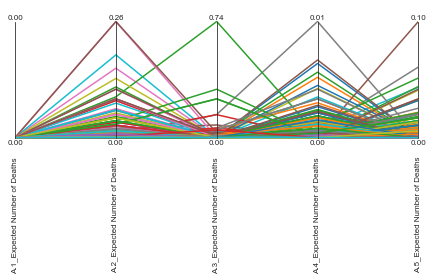

In [13]:
from ema_workbench.analysis import parcoords
parcoord = deaths2.loc[:, ['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths']]
limits2 = parcoords.get_limits(parcoord)
axes = parcoords.ParallelAxes(limits2, fontsize=8)
axes.plot(parcoord)

plt.show()

The above parcoords figure was created after a suspision of a tradeoff in deaths per location. This seems to be confirmed by the image, that if the dikes break in one location, they are unlikely to break in another. This is explicable, because a dike breaking reduces the water load on the other dikes.